# ðŸ“ˆ Sales Prediction with Python

Hi there! In this notebook, we'll explore how advertising budgets impact product sales using machine learning. We'll work with the classic advertising dataset, which tracks spending on TV, Radio, and Newspaper, and see how well we can predict sales using regression models.

Let's dive in and see what insights we can uncover!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display plots inline
%matplotlib inline


In [3]:
# Load the dataset
df = pd.read_csv("advertising.csv")
df.head()


TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [4]:
# Check dataset info
df.info()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

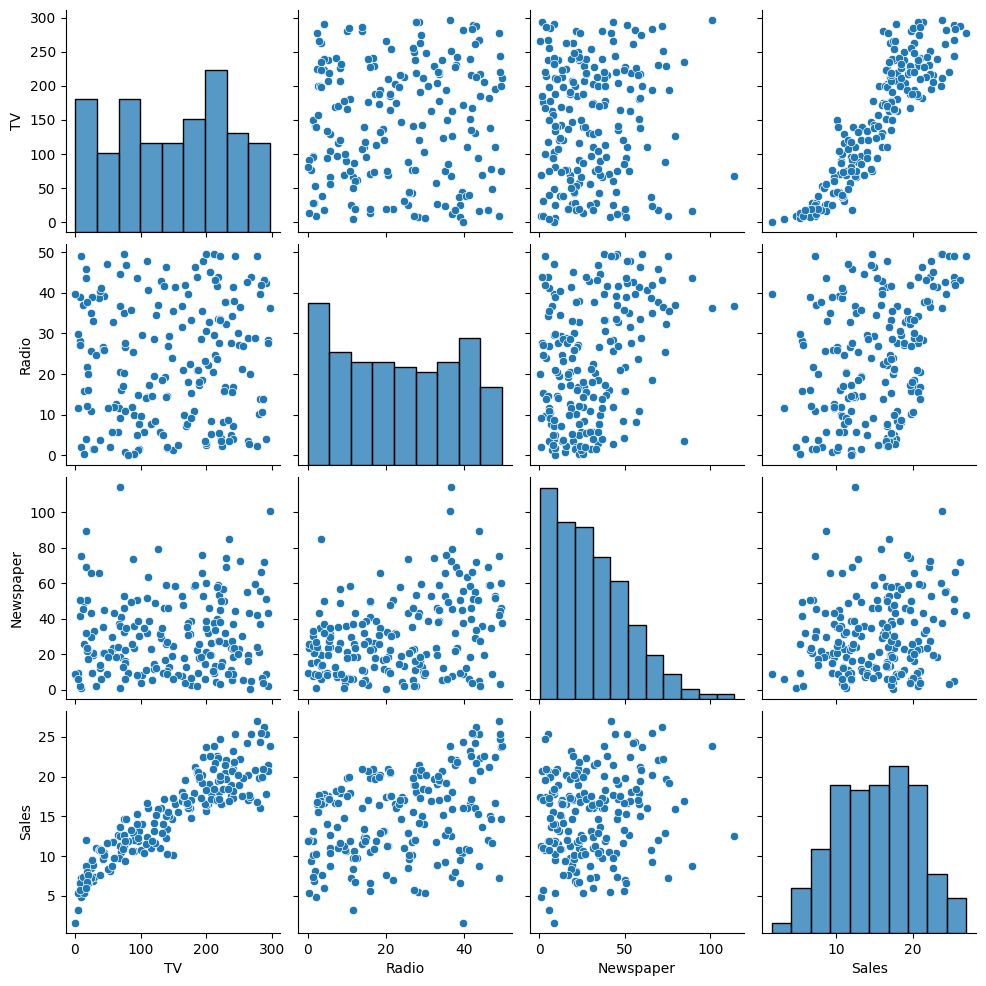

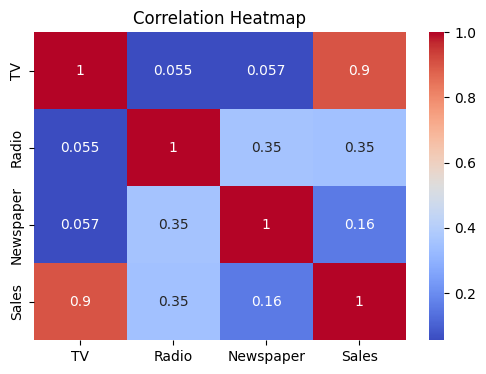

In [5]:
# Pairplot to see relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Select the columns we want to use for prediction
features = ['TV', 'Radio', 'Newspaper']
X = df[features]  # This is our input data
y = df['Sales']   # This is what we want to predict

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split  # Just in case it's not imported above
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Now X_train and y_train will be used to train the model,
# and X_test and y_test will be used to see how well it works


In [7]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


MAE: 1.27
RMSE: 1.71
RÂ² Score: 0.91


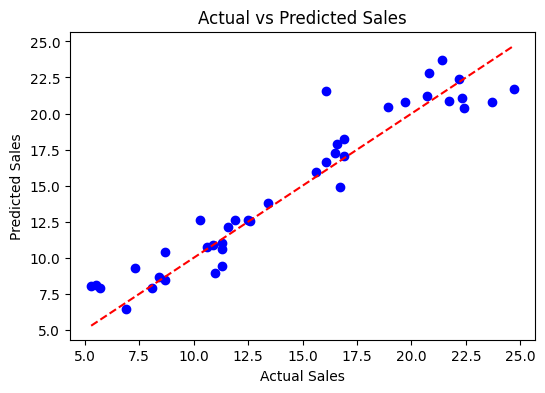

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"RÂ² Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## âœ… Conclusion

Our linear regression model gives us a good look at how different advertising channels affect sales. TV and Radio spending seem to have the biggest impact, while Newspaper ads don't move the needle as much.

Of course, this is just a starting point! You can try adding more data or experimenting with other algorithms to make even better predictions. Thanks for following along!